In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean


In [22]:
df_inpiedi = pd.read_csv("info_inpiedi8.txt",sep="\\t")
df_seduta = pd.read_csv("info_seduta8.txt",sep="\\t")
df_sdraiata = pd.read_csv("info_sdraiata8.txt",sep="\\t")

<ipython-input-22-a2fb9d190f8b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_inpiedi = pd.read_csv("info_inpiedi8.txt",sep="\\t")
<ipython-input-22-a2fb9d190f8b>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_seduta = pd.read_csv("info_seduta8.txt",sep="\\t")
<ipython-input-22-a2fb9d190f8b>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sdraiata = pd.read_csv("info_sdraiata8.txt",sep="\\t")


In [24]:
df = pd.concat((df_inpiedi,df_seduta,df_sdraiata))
df

,Time,"Start,Mid,End,Avg",Name,Word,Vowel,f1,f2,f3
0,0.005,start,inpiedi,Ho,o,--undefined--,--undefined--,--undefined--
1,0.2075,midpoint,inpiedi,Ho,o,3263.1121107638232,--undefined--,--undefined--
2,0.41,end,inpiedi,Ho,o,3042.3205629537892,4682.293360775254,--undefined--
3,0.005:0.41,avg,inpiedi,Ho,o,3011.475526754525,4773.287068669024,--undefined--
4,0.415,start,inpiedi,NaN,<p:>,3089.331507117877,4527.478004403325,--undefined--
...,...,...,...,...,...,...,...,...
487,15.315000000000001:15.43,avg,sdraiata,aiuola,a,1055.419543166856,2879.429404273336,3130.7152823764395
488,15.435,start,sdraiata,NaN,<p:>,931.2110316001877,3353.1651471850373,--undefined--
489,17.147704,midpoint,sdraiata,NaN,<p:>,1847.7760759470593,3901.275603722105,4832.607595828853
490,18.860408,end,sdraiata,NaN,<p:>,--undefined--,--undefined--,--undefined--


In [25]:
def is_numeric(x):
    try:
        float(x)
        return True
    except:
        return False

In [62]:
formants = ("f1","f2","f3")
positions = ("inpiedi","seduta","sdraiata")
positions_en = ("standing","sitting","lying")
vowels = ("a","e","E","i","o","O","j","w")

In [63]:
vals = np.zeros(tuple(map(len,(formants,vowels,positions))))
for vi,v in enumerate(vowels):
    df_v = df[df.Vowel == v]
    for pi,p in enumerate(positions):
        df_vp = df_v[df_v.Name == p]
        for fi,f in enumerate(formants):
            try:
                m = mean(map(float,filter(is_numeric,df_vp[f])))
            except:
                m = 0
            vals[fi,vi,pi] = m

In [64]:
def plot_formant(avg_mat):
    fig, ax = plt.subplots()

    for v in avg_mat:
        ax.plot(positions_en,v)
        
    ax.set_ylabel("Hz")
    ax.legend(vowels)
    return fig

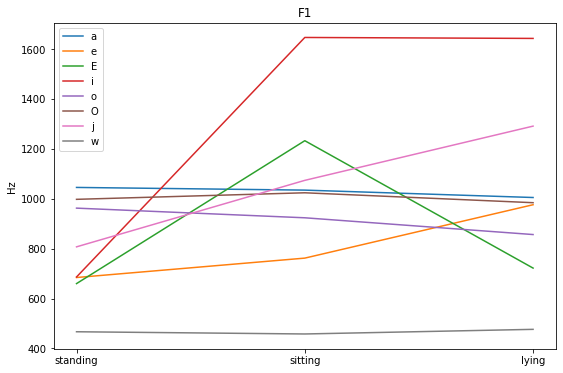

In [65]:
f = plot_formant(vals[0])

f.set_size_inches(9,6)
plt.title("F1")

plt.show()

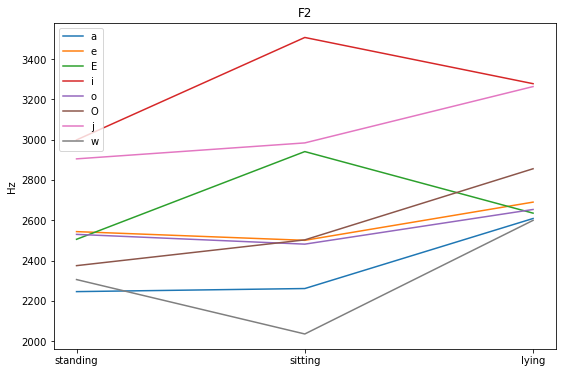

In [66]:
f = plot_formant(vals[1])

f.set_size_inches(9,6)
plt.title("F2")

plt.show()

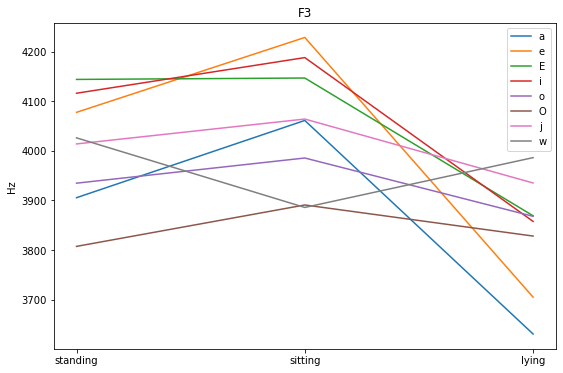

In [67]:
f = plot_formant(vals[2])

f.set_size_inches(9,6)
plt.title("F3")

plt.show()